In [29]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from experiments.evaluation import plot_scores, display_stats, plot_ci, plot_ci_all
from datasets.load import load_classification_datasets, load_regression_datasets


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
path_class = '/home/victor/git/rna-ppgee/artigo2/report/figures/classification_experiment_chart_data.csv'
path_reg = '/home/victor/git/rna-ppgee/artigo2/report/figures/regression_experiment_chart_data.csv'
save_path = '/home/victor/git/rna-ppgee/artigo2/report/figures'


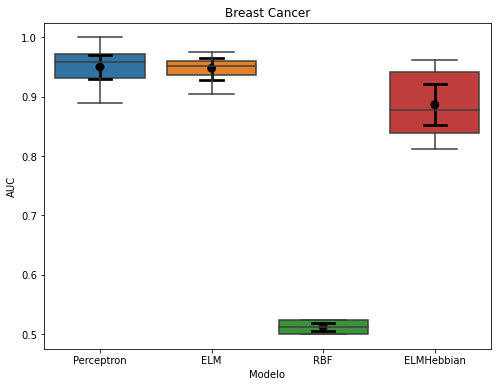

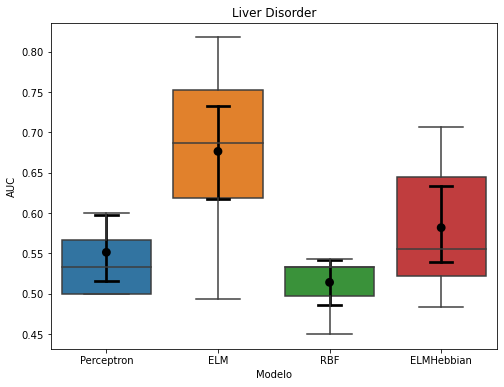

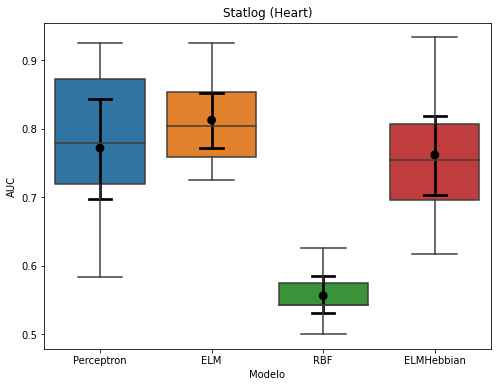

In [39]:
plot_ci(path_class, 'AUC', 'Modelo', save_path)

In [19]:
display_stats(path_class, 'AUC')

score                                      \
model_name                    ELM        ELMHebbian        Perceptron   
dataset                                                                 
Breast Cancer    0.95 (0.93,0.96)  0.89 (0.85,0.92)  0.95 (0.93,0.97)   
Liver Disorder   0.68 (0.62,0.74)  0.58 (0.53,0.62)  0.53 (0.51,0.55)   
Statlog (Heart)  0.81 (0.77,0.85)  0.76 (0.70,0.82)  0.77 (0.70,0.84)   

                                   
model_name                    RBF  
dataset                            
Breast Cancer    0.51 (0.50,0.52)  
Liver Disorder   0.52 (0.50,0.54)  
Statlog (Heart)  0.55 (0.52,0.57)

In [20]:
display_stats(path_reg, 'MSE')

score                                    
model_name               Adaline               ELM               RBF
dataset                                                             
Boston Housing  0.07 (0.05,0.09)  0.01 (0.01,0.01)  0.04 (0.03,0.06)
Diabetes        0.06 (0.05,0.07)  0.03 (0.03,0.03)  0.06 (0.05,0.06)
Parkinsons      0.04 (0.02,0.05)  0.00 (0.00,0.01)  0.04 (0.02,0.05)

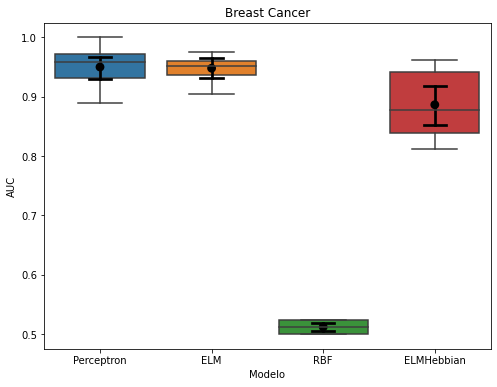

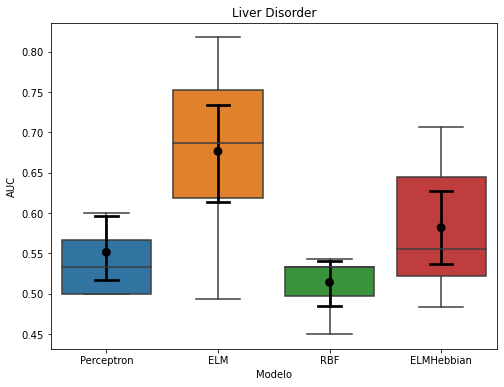

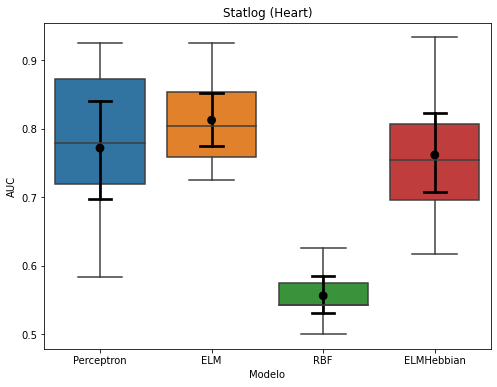

In [40]:
plot_scores(path_class, 'AUC', 'Modelo', save_path)

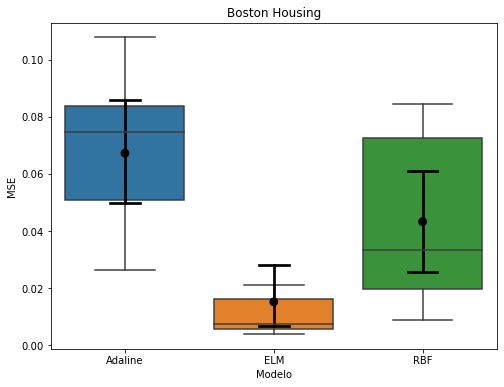

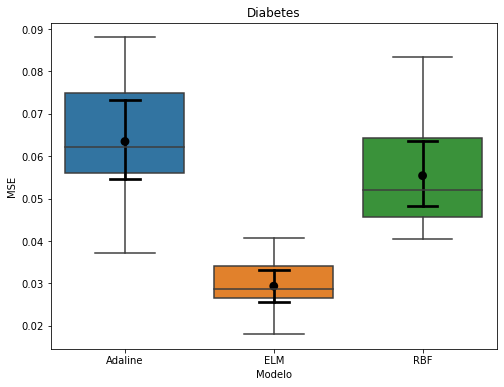

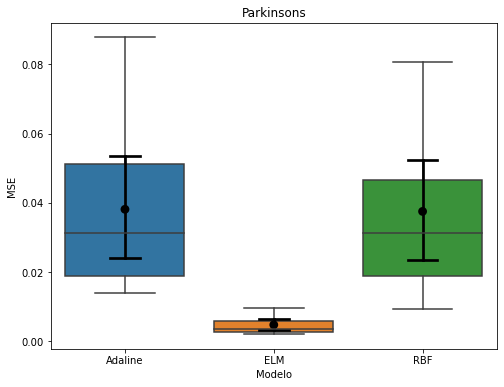

In [41]:
plot_scores(path_reg, 'MSE', 'Modelo', save_path)